In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

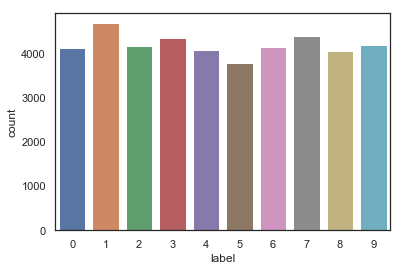

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [3]:
X_train = X_train / 255.0
test = test / 255.0

In [4]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [5]:
n_values = np.max(Y_train) + 1
Y_train = np.eye(n_values)[Y_train]

# Y_train = to_categorical(Y_train, num_classes = 10)

In [6]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

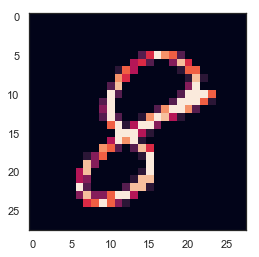

In [7]:
g = plt.imshow(X_train[0][:,:,0])

In [8]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=im_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(32))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', ## 'sparse_categorical_crossentropy'
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train,Y_train, batch_size=32, epochs=30, validation_split=0.2)

Train on 30240 samples, validate on 7560 samples
Epoch 1/30
30240/30240 [==============================] - 46s 2ms/step - loss: 0.2458 - acc: 0.9249 - val_loss: 0.1036 - val_acc: 0.9660
Epoch 2/30
30240/30240 [==============================] - 11s 379us/step - loss: 0.0786 - acc: 0.9753 - val_loss: 0.0571 - val_acc: 0.9816
Epoch 3/30
30240/30240 [==============================] - 12s 380us/step - loss: 0.0560 - acc: 0.9821 - val_loss: 0.0484 - val_acc: 0.9849
Epoch 4/30
30240/30240 [==============================] - 12s 401us/step - loss: 0.0429 - acc: 0.9869 - val_loss: 0.0473 - val_acc: 0.9860: 0
Epoch 5/30
30240/30240 [==============================] - 12s 403us/step - loss: 0.0363 - acc: 0.9883 - val_loss: 0.0471 - val_acc: 0.9862
Epoch 6/30
30240/30240 [==============================] - 12s 393us/step - loss: 0.0290 - acc: 0.9911 - val_loss: 0.0465 - val_acc: 0.9866
Epoch 7/30
30240/30240 [==============================] - 12s 399us/step - loss: 0.0240 - acc: 0.9923 - val_loss: 0.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X_train.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10))
            model.add(Activation('softmax'))

            tensorboard = TensorBoard(log_dir="logs_MNIST/{}".format(NAME))

            model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X_train, Y_train,
                      batch_size=32,
                      epochs=8,
                      validation_split=0.2,
                      callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1555448121
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
30240/30240 [==============================] - 40s 1ms/step - loss: 0.2996 - acc: 0.9150 - val_loss: 0.1229 - val_acc: 0.9649
Epoch 2/8
30240/30240 [==============================] - 38s 1ms/step - loss: 0.1000 - acc: 0.9722 - val_loss: 0.0834 - val_acc: 0.9757
Epoch 3/8
30240/30240 [==============================] - 41s 1ms/step - loss: 0.0698 - acc: 0.9795 - val_loss: 0.0696 - val_acc: 0.9800
Epoch 4/8
30240/30240 [==============================] - 59s 2ms/step - loss: 0.0542 - acc: 0.9846 - val_loss: 0.0638 - val_acc: 0.9804
Epoch 5/8
30240/30240 [==============================] - 52s 2ms/step - loss: 0.0460 - acc: 0.9859 - val_loss: 0.0625 - val_acc: 0.9813
Epoch 6/8
30240/30240 [==============================] - 55s 2ms/step - loss: 0.0382 - acc: 0.9884 - val_loss: 0.0632 - val_acc: 0.9803
Epoch 7/8
30240/30240 [==============================] - 52s 2ms/step - loss: 0.0329 - acc: 0.9900 -

30240/30240 [==============================] - 67s 2ms/step - loss: 0.0538 - acc: 0.9836 - val_loss: 0.0691 - val_acc: 0.9795
Epoch 7/8
30240/30240 [==============================] - 70s 2ms/step - loss: 0.0475 - acc: 0.9852 - val_loss: 0.0739 - val_acc: 0.9779
Epoch 8/8
30240/30240 [==============================] - 68s 2ms/step - loss: 0.0426 - acc: 0.9862 - val_loss: 0.0670 - val_acc: 0.9811
1-conv-64-nodes-0-dense-1555449594
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
30240/30240 [==============================] - 47s 2ms/step - loss: 0.2633 - acc: 0.9254 - val_loss: 0.1134 - val_acc: 0.9657
Epoch 2/8
30240/30240 [==============================] - 53s 2ms/step - loss: 0.0913 - acc: 0.9741 - val_loss: 0.0751 - val_acc: 0.9767
Epoch 3/8
30240/30240 [==============================] - 49s 2ms/step - loss: 0.0638 - acc: 0.9808 - val_loss: 0.0675 - val_acc: 0.9778
Epoch 4/8
30240/30240 [==============================] - 47s 2ms/step - loss: 0.0492 - acc: 0.9849 - val_loss:

30240/30240 [==============================] - 58s 2ms/step - loss: 0.0286 - acc: 0.9912 - val_loss: 0.0377 - val_acc: 0.9888c: 0
Epoch 6/8
30240/30240 [==============================] - 63s 2ms/step - loss: 0.0211 - acc: 0.9932 - val_loss: 0.0378 - val_acc: 0.9892
Epoch 7/8
30240/30240 [==============================] - 62s 2ms/step - loss: 0.0160 - acc: 0.9949 - val_loss: 0.0451 - val_acc: 0.9884
Epoch 8/8
30240/30240 [==============================] - 58s 2ms/step - loss: 0.0142 - acc: 0.9953 - val_loss: 0.0473 - val_acc: 0.9874
3-conv-64-nodes-0-dense-1555450513
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
30240/30240 [==============================] - 73s 2ms/step - loss: 0.2774 - acc: 0.9145 - val_loss: 0.0925 - val_acc: 0.9688
Epoch 2/8
30240/30240 [==============================] - 76s 2ms/step - loss: 0.0886 - acc: 0.9722 - val_loss: 0.0880 - val_acc: 0.9737
Epoch 3/8
30240/30240 [==============================] - 73s 2ms/step - loss: 0.0615 - acc: 0.9806 - val_l

30240/30240 [==============================] - 73s 2ms/step - loss: 0.0331 - acc: 0.9899 - val_loss: 0.0589 - val_acc: 0.9828
Epoch 6/8
30240/30240 [==============================] - 75s 2ms/step - loss: 0.0262 - acc: 0.9916 - val_loss: 0.0629 - val_acc: 0.9824
Epoch 7/8
30240/30240 [==============================] - 65s 2ms/step - loss: 0.0197 - acc: 0.9940 - val_loss: 0.0655 - val_acc: 0.9828
Epoch 8/8
30240/30240 [==============================] - 60s 2ms/step - loss: 0.0154 - acc: 0.9954 - val_loss: 0.0623 - val_acc: 0.9828
2-conv-128-nodes-0-dense-1555451678
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
30240/30240 [==============================] - 58s 2ms/step - loss: 0.1827 - acc: 0.9445 - val_loss: 0.0643 - val_acc: 0.9802
Epoch 2/8
27840/30240 [==========================>...] - ETA: 5s - loss: 0.0545 - acc: 0.9833WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.274905). Check your callbacks.


30240/30240 [==============================] - 69s 2ms/step - loss: 0.0547 - acc: 0.9831 - val_loss: 0.0402 - val_acc: 0.9870
Epoch 3/8
30240/30240 [==============================] - 61s 2ms/step - loss: 0.0352 - acc: 0.9889 - val_loss: 0.0414 - val_acc: 0.9877
Epoch 4/8
30240/30240 [==============================] - 58s 2ms/step - loss: 0.0252 - acc: 0.9915 - val_loss: 0.0380 - val_acc: 0.9889
Epoch 5/8
30240/30240 [==============================] - 57s 2ms/step - loss: 0.0194 - acc: 0.9938 - val_loss: 0.0411 - val_acc: 0.9878
Epoch 6/8
30240/30240 [==============================] - 67s 2ms/step - loss: 0.0147 - acc: 0.9957 - val_loss: 0.0388 - val_acc: 0.9902
Epoch 7/8
30240/30240 [==============================] - 57s 2ms/step - loss: 0.0135 - acc: 0.9959 - val_loss: 0.0538 - val_acc: 0.9869
Epoch 8/8
30240/30240 [==============================] - 56s 2ms/step - loss: 0.0104 - acc: 0.9968 - val_loss: 0.0453 - val_acc: 0.9892
3-conv-128-nodes-0-dense-1555452176
Train on 30240 samples

30240/30240 [==============================] - 95s 3ms/step - loss: 0.0472 - acc: 0.9848 - val_loss: 0.0536 - val_acc: 0.9845
Epoch 4/8
30240/30240 [==============================] - 75s 2ms/step - loss: 0.0324 - acc: 0.9899 - val_loss: 0.0583 - val_acc: 0.9847
Epoch 5/8
30240/30240 [==============================] - 77s 3ms/step - loss: 0.0252 - acc: 0.9920 - val_loss: 0.0649 - val_acc: 0.9823
Epoch 6/8
30240/30240 [==============================] - 74s 2ms/step - loss: 0.0214 - acc: 0.9933 - val_loss: 0.0721 - val_acc: 0.9799: 
Epoch 7/8
30240/30240 [==============================] - 70s 2ms/step - loss: 0.0151 - acc: 0.9950 - val_loss: 0.0674 - val_acc: 0.9843
Epoch 8/8
21056/30240 [===================>..........] - ETA: 24s - loss: 0.0128 - acc: 0.9957WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.187638). Check your callbacks.


29792/30240 [============================>.] - ETA: 1s - loss: 0.0131 - acc: 0.9958WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.200217). Check your callbacks.


30240/30240 [==============================] - 93s 3ms/step - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0669 - val_acc: 0.9849
1-conv-32-nodes-1-dense-1555452856
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
12416/30240 [===========>..................] - ETA: 3:26 - loss: 0.4415 - acc: 0.8719WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.432621). Check your callbacks.


14240/30240 [=============>................] - ETA: 2:53 - loss: 0.4088 - acc: 0.8814WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.115888). Check your callbacks.


30240/30240 [==============================] - 194s 6ms/step - loss: 0.2787 - acc: 0.9194 - val_loss: 0.1071 - val_acc: 0.9694
Epoch 2/8
 5248/30240 [====>.........................] - ETA: 1:06 - loss: 0.0978 - acc: 0.9707WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.100245). Check your callbacks.


30240/30240 [==============================] - 60s 2ms/step - loss: 0.0918 - acc: 0.9731 - val_loss: 0.0799 - val_acc: 0.9769
Epoch 3/8
30240/30240 [==============================] - 68s 2ms/step - loss: 0.0609 - acc: 0.9817 - val_loss: 0.0613 - val_acc: 0.9810
Epoch 4/8
30240/30240 [==============================] - 70s 2ms/step - loss: 0.0441 - acc: 0.9868 - val_loss: 0.0632 - val_acc: 0.9796
Epoch 5/8
30240/30240 [==============================] - 74s 2ms/step - loss: 0.0341 - acc: 0.9894 - val_loss: 0.0584 - val_acc: 0.9811
Epoch 6/8
30240/30240 [==============================] - 74s 2ms/step - loss: 0.0271 - acc: 0.9916 - val_loss: 0.0615 - val_acc: 0.9820
Epoch 7/8
12000/30240 [==========>...................] - ETA: 1:04 - loss: 0.0204 - acc: 0.9936WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.677087). Check your callbacks.


30240/30240 [==============================] - 109s 4ms/step - loss: 0.0214 - acc: 0.9932 - val_loss: 0.0540 - val_acc: 0.9856
Epoch 8/8
30240/30240 [==============================] - 78s 3ms/step - loss: 0.0152 - acc: 0.9951 - val_loss: 0.0572 - val_acc: 0.9858
2-conv-32-nodes-1-dense-1555453608
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
11488/30240 [==========>...................] - ETA: 43s - loss: 0.5276 - acc: 0.8417WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.121782). Check your callbacks.


30240/30240 [==============================] - 75s 2ms/step - loss: 0.2922 - acc: 0.9132 - val_loss: 0.0949 - val_acc: 0.9680
Epoch 2/8
30240/30240 [==============================] - 52s 2ms/step - loss: 0.0843 - acc: 0.9743 - val_loss: 0.0730 - val_acc: 0.9778
Epoch 3/8
30240/30240 [==============================] - 48s 2ms/step - loss: 0.0590 - acc: 0.9825 - val_loss: 0.0673 - val_acc: 0.9794
Epoch 4/8
30240/30240 [==============================] - 45s 1ms/step - loss: 0.0468 - acc: 0.9845 - val_loss: 0.0472 - val_acc: 0.9851
Epoch 5/8
30240/30240 [==============================] - 53s 2ms/step - loss: 0.0353 - acc: 0.9892 - val_loss: 0.0421 - val_acc: 0.9862
Epoch 6/8
30240/30240 [==============================] - 49s 2ms/step - loss: 0.0298 - acc: 0.9909 - val_loss: 0.0511 - val_acc: 0.9845
Epoch 7/8
30240/30240 [==============================] - 53s 2ms/step - loss: 0.0256 - acc: 0.9911 - val_loss: 0.0413 - val_acc: 0.9876
Epoch 8/8
30240/30240 [==============================] - 4

30240/30240 [==============================] - 60s 2ms/step - loss: 0.0426 - acc: 0.9863 - val_loss: 0.0664 - val_acc: 0.9791
1-conv-64-nodes-1-dense-1555454492
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
30240/30240 [==============================] - 54s 2ms/step - loss: 0.2138 - acc: 0.9366 - val_loss: 0.0814 - val_acc: 0.9758
Epoch 2/8
30240/30240 [==============================] - 49s 2ms/step - loss: 0.0674 - acc: 0.9789 - val_loss: 0.0632 - val_acc: 0.9798
Epoch 3/8
30240/30240 [==============================] - 49s 2ms/step - loss: 0.0424 - acc: 0.9864 - val_loss: 0.0546 - val_acc: 0.9852
Epoch 4/8
30240/30240 [==============================] - 46s 2ms/step - loss: 0.0296 - acc: 0.9911 - val_loss: 0.0567 - val_acc: 0.9817: 0.
Epoch 5/8
30240/30240 [==============================] - 44s 1ms/step - loss: 0.0192 - acc: 0.9935 - val_loss: 0.0593 - val_acc: 0.9827
Epoch 6/8
30240/30240 [==============================] - 44s 1ms/step - loss: 0.0161 - acc: 0.9949 - val_l

30240/30240 [==============================] - 51s 2ms/step - loss: 0.0436 - acc: 0.9864 - val_loss: 0.0618 - val_acc: 0.9810
Epoch 6/8
30240/30240 [==============================] - 49s 2ms/step - loss: 0.0356 - acc: 0.9882 - val_loss: 0.0552 - val_acc: 0.9839
Epoch 7/8
30240/30240 [==============================] - 55s 2ms/step - loss: 0.0280 - acc: 0.9906 - val_loss: 0.0514 - val_acc: 0.9845
Epoch 8/8
30240/30240 [==============================] - 50s 2ms/step - loss: 0.0224 - acc: 0.9930 - val_loss: 0.0706 - val_acc: 0.9821
1-conv-128-nodes-1-dense-1555455758
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
30240/30240 [==============================] - 61s 2ms/step - loss: 0.1760 - acc: 0.9476 - val_loss: 0.0939 - val_acc: 0.9702
Epoch 2/8
30240/30240 [==============================] - 55s 2ms/step - loss: 0.0568 - acc: 0.9828 - val_loss: 0.0572 - val_acc: 0.9824
Epoch 3/8
30240/30240 [==============================] - 54s 2ms/step - loss: 0.0316 - acc: 0.9900 - val_loss

30240/30240 [==============================] - 110s 4ms/step - loss: 0.2397 - acc: 0.9230 - val_loss: 0.0819 - val_acc: 0.9749
Epoch 2/8
30240/30240 [==============================] - 103s 3ms/step - loss: 0.0758 - acc: 0.9759 - val_loss: 0.0695 - val_acc: 0.9790
Epoch 3/8
30240/30240 [==============================] - 71s 2ms/step - loss: 0.0523 - acc: 0.9844 - val_loss: 0.0692 - val_acc: 0.9803oss: 0.0516 - acc: 
Epoch 4/8
30240/30240 [==============================] - 69s 2ms/step - loss: 0.0395 - acc: 0.9869 - val_loss: 0.0571 - val_acc: 0.9819
Epoch 5/8
30240/30240 [==============================] - 69s 2ms/step - loss: 0.0300 - acc: 0.9904 - val_loss: 0.0714 - val_acc: 0.9812
Epoch 6/8
30240/30240 [==============================] - 68s 2ms/step - loss: 0.0271 - acc: 0.9908 - val_loss: 0.0625 - val_acc: 0.9820
Epoch 7/8
30240/30240 [==============================] - 69s 2ms/step - loss: 0.0186 - acc: 0.9937 - val_loss: 0.0766 - val_acc: 0.9796
Epoch 8/8
30240/30240 [==============

30240/30240 [==============================] - 52s 2ms/step - loss: 0.0193 - acc: 0.9937 - val_loss: 0.0609 - val_acc: 0.9823
3-conv-32-nodes-2-dense-1555458179
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
30240/30240 [==============================] - 85s 3ms/step - loss: 0.4342 - acc: 0.8600 - val_loss: 0.1432 - val_acc: 0.9550
Epoch 2/8
30240/30240 [==============================] - 57s 2ms/step - loss: 0.1480 - acc: 0.9555 - val_loss: 0.1045 - val_acc: 0.9672
Epoch 3/8
30240/30240 [==============================] - 57s 2ms/step - loss: 0.1076 - acc: 0.9670 - val_loss: 0.0897 - val_acc: 0.9717
Epoch 4/8
30240/30240 [==============================] - 58s 2ms/step - loss: 0.0882 - acc: 0.9720 - val_loss: 0.0848 - val_acc: 0.9741
Epoch 5/8
30240/30240 [==============================] - 57s 2ms/step - loss: 0.0720 - acc: 0.9774 - val_loss: 0.0769 - val_acc: 0.9754
Epoch 6/8
30240/30240 [==============================] - 59s 2ms/step - loss: 0.0623 - acc: 0.9809 - val_loss:

30240/30240 [==============================] - 44s 1ms/step - loss: 0.0437 - acc: 0.9860 - val_loss: 0.0479 - val_acc: 0.9857
Epoch 4/8
30240/30240 [==============================] - 40s 1ms/step - loss: 0.0314 - acc: 0.9899 - val_loss: 0.0395 - val_acc: 0.9886
Epoch 5/8
30240/30240 [==============================] - 42s 1ms/step - loss: 0.0258 - acc: 0.9920 - val_loss: 0.0458 - val_acc: 0.9857
Epoch 6/8
30240/30240 [==============================] - 48s 2ms/step - loss: 0.0203 - acc: 0.9932 - val_loss: 0.0560 - val_acc: 0.9865
Epoch 7/8
30240/30240 [==============================] - 46s 2ms/step - loss: 0.0170 - acc: 0.9940 - val_loss: 0.0421 - val_acc: 0.9884
Epoch 8/8
30240/30240 [==============================] - 46s 2ms/step - loss: 0.0130 - acc: 0.9956 - val_loss: 0.0513 - val_acc: 0.9873
3-conv-64-nodes-2-dense-1555459482
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
30240/30240 [==============================] - 73s 2ms/step - loss: 0.3550 - acc: 0.8849 - val_loss:

30240/30240 [==============================] - 75s 2ms/step - loss: 0.0362 - acc: 0.9888 - val_loss: 0.0434 - val_acc: 0.9866
Epoch 4/8
30240/30240 [==============================] - 69s 2ms/step - loss: 0.0260 - acc: 0.9917 - val_loss: 0.0438 - val_acc: 0.9876
Epoch 5/8
30240/30240 [==============================] - 70s 2ms/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0419 - val_acc: 0.9876
Epoch 6/8
30240/30240 [==============================] - 69s 2ms/step - loss: 0.0164 - acc: 0.9946 - val_loss: 0.0580 - val_acc: 0.9858
Epoch 7/8
30240/30240 [==============================] - 70s 2ms/step - loss: 0.0151 - acc: 0.9951 - val_loss: 0.0588 - val_acc: 0.9866
Epoch 8/8
30240/30240 [==============================] - 69s 2ms/step - loss: 0.0132 - acc: 0.9955 - val_loss: 0.0488 - val_acc: 0.9878
3-conv-128-nodes-2-dense-1555461184
Train on 30240 samples, validate on 7560 samples
Epoch 1/8
30240/30240 [==============================] - 90s 3ms/step - loss: 0.2488 - acc: 0.9204 - val_loss